# **Apresentação dos Dados - 10 anos de brasileirão**

# **Probabilidades**

In [ ]:
import numpy as np
import numpy.random as randint
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from numpy import mean
from matplotlib import pyplot
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data-Camp-Brasileiro_1.csv', delimiter=';')

In [ ]:
df.head(10)

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
0,2009,1,Flamengo,67,19,10,9,58,44,14,58.8,RJ
1,2009,2,Internacional,65,19,8,11,65,44,21,57.0,RS
2,2009,3,Sao Paulo,65,18,11,9,57,42,15,57.0,SP
3,2009,4,Cruzeiro,62,18,8,12,58,53,5,54.4,MG
4,2009,5,Palmeiras,62,17,11,10,58,45,13,54.4,SP
5,2009,6,Avai,57,15,12,11,61,52,9,50.0,SC
6,2009,7,Atletico MG,56,16,8,14,55,56,-1,49.1,MG
7,2009,8,Gremio,55,15,10,13,67,46,21,48.2,RS
8,2009,9,Goias,55,15,10,13,64,65,-1,48.2,GO
9,2009,10,Corinthians,52,14,10,14,50,54,-4,45.6,SP


##Probabilidade Simples

Qual a probabilidade de um time levar mais de 55 gols durante o campeonato?

In [ ]:
probGolContra = len(df[df['Gols Contra'] > 55]) / len(df)
print('A probabilidade de um time levar mais de 55 gols durante o campeonato é de: ' + str(round((probGolContra*100),4)) + '%')

A probabilidade de um time levar mais de 55 gols durante o campeonato é de: 19.5%


Dentro do campeonato brasileiro, é de suma importância saber quantos gols um time marca e quantos gols um time sofre. Com esses dados podemos fazer analises sobre o estado atual da defesa e o ataque de um time, assim como o seu desempenho durante o campeonato. Com a apresentação deste dado, podemos analisar a porcentagem dos times ao longo destes 10 anos de historia do campeonato brasileiro levaram mais que 55 gols.


##Probabilidade da União

Qual a probabilidade de um time ter mais que 60 gols ou ter 20 ou mais vitorias?

In [ ]:
uniao = len(df[(df['Gols pro']>60) | (df['Vitoria']>=20)])
probUniao = round(uniao/len(df),4)

print('A probabilidade de ter feito mais que 60 gols ou ter mais que 20 vitorias é de ' + str(round((probUniao*100),4)) + '%')

A probabilidade de ter feito mais que 60 gols ou ter mais que 20 vitorias é de 16.0%


Esta probabilidade mostra a porcentagem de times que durante o campeonato marcaram bastante ou estão com 20 ou mais vitórias. Gols são importantes porém não são tudo, mesmo que com um excelente ataque marcando muitos gols não necessariamente você terá muitas vitórias já que sua defesa pode ser falha e por assim levar vários gols. 

Referencia externa: https://yoursoccerhome.com/a-goal-in-soccer-its-worth-scoring-system-and-the-rules/

Frase retirada da referencia acima:
"As you can see, ultimately, the amount of goals scored by a team isn’t the most important factor in a game. What matters most is that one team ends the game with more goals than the other team."

##Probabilidade da Intersecção

Qual a probabilidade de um time levar mais que 55 gols e estar no Z4(Zona de rebaixamento)?

In [ ]:
intersec = len(df[(df['Gols Contra']>55) & (df['Posicao'] >= 17)])
probIntersec = intersec/len(df)

print('A probabilidade de um time levar mais que 50 gols e estar no z4 é de: ' + str(round((probIntersec*100),4)) + '%')

A probabilidade de um time levar mais que 50 gols e estar no z4 é de: 11.0%


Esta probabilidade faz uma analise dos times qual tomaram mais que 55 gols e estarem dentro do Z4 (São os quatros times com as piores colocações entre os 20 times, que possuem o risco de serem rebaixados para uma outra liga). Caso seu clube leve vários gols, existe a grande possibilidade de também obter várias derrotas logo também a má colocação na tabela!

##Probabilidade do Complemento

Qual a probabilidade de um time levar menos que 55 gols e estar no Z4 (Zona de rebaixamento)?

In [ ]:
probComp = probGolContra - probIntersec
print('A probabilidade de um time levar menos que 55 gols e estar no z4 é de: ' + str(round((probComp*100),4)) + '%')


A probabilidade de um time levar menos que 55 gols e estar no z4 é de: 8.5%


Esta probabilidade faz a análise de um time que tenha levado menos que 55 gols e ainda sim estar no Z4. Mesmo que você leve poucos gols, caso não marque gols não ira alcançar a vitória, por isso existem times que levam menos de 55 gols porém ainda estão sendo rebaixados de sua divisão.

##Probabilidade da Diferença

Qual a probabilidade de um time estar no G4 (Quatro primeiros colocados da tabela) mas tenha menos de 55 gols marcados?

In [ ]:
AcompSibNaoAcompParch = len(df[df['Gols pro']<55]) - len(df[(df['Gols pro']<55) & (df['Posicao']>=4)]) 
probAcompSibNaoAcompParch = AcompSibNaoAcompParch/len(df)

print('A probabilidade de um time estar no G4 mas tenha menos de 55 gols marcados é de: ' + str(round((probAcompSibNaoAcompParch*100),4)) + '%')

A probabilidade de um time estar no G4 mas tenha menos de 55 gols marcados é de: 4.5%


Esta probabilidade conta as chances de um time que tenha marcado menos de 55 gols na temporada e esta classificado como um dos top 4 do campeonato. Um time considerado como um dos quatro melhoras da liga marcando menos que 55 gols pode ser considerado um valor baixo, porém sua defesa durante o campeonato pode ter sido consistente.

##Probabilidade Condicional

Qual a probabilidade de um time estar na Z4 sabendo que ele levou mais de 55 gols?

In [ ]:
probCond = probIntersec / probGolContra
print('A probabilidade de um time não estar na z4 sabendo que ele levou mais de 55 gols é de: ' + str(round((probCond*100),4)) + '%')

A probabilidade de um time não estar na z4 sabendo que ele levou mais de 55 gols é de: 56.4103%


Esta probabilidade apresenta a porcentagem de um time escolhido estar no Z4 sabendo que o mesmo ja sofreu mais que 55 gols durante o campeonato. Devido a grande quantidade de gols sofrida, é plausivel pensar-se que este poderia esta sendo rebaixado de divisão, já que sua defesa se provou inconsistente 

##Teorema de Bayes

Qual a probabilidade de um time tenha tomado 50 gols ou mais, tal que ele esteja no G4?

In [ ]:
probTmGol = len(df[df['Gols Contra'] >= 50]) / len(df)

probG4 = len(df[df['Posicao'] <=4]) / len(df)

intersec1 = len(df[(df['Gols Contra']>=50) & (df['Posicao'] <= 4 )])
probIntersec1 = intersec1/len(df)

probCond1 = probIntersec1/probTmGol

uniao1 = len(df[(df['Gols Contra']>=50) | (df['Posicao']<=4)])
probUniao1 = round(uniao1/len(df),4)

probMutqAcomp = (probG4*probCond1)/probUniao1
print("A probabilidade de um time ter tomado 50 gols ou mais na temporada sabendo que ele está no G4 é de: " + str(round((probMutqAcomp*100),4)) + '%')

A probabilidade de um time ter tomado 50 gols ou mais na temporada sabendo que ele está no G4 é de: 1.5649%


Esta probabilidade calcula a porcentagem de times que estavam no G4 e tenham tomado 50 ou mais gols. É provavel que, estando no topo da tabela a defesa de um time seja boa, logo espera-se que não tenham tomado uma grande quantidade de gols!

##Variavel Aleatoria

Fiz a criação de duas variaveis aleatorias, a primeira foi a soma total dos jogos para descobrir a quantidade de rodadas jogadas durante o torneiro, já a segunda eu peguei os gols feitos por cada time e fiz uma divisão com a primeira váriavel, descobrindo assim a média de gols feitas por partida por cada time! Assim poderemos trabalhar com esses dados para ver quem pontuou mais por rodadas jogadas.

In [ ]:
df['Partidas Jogadas'] = df['Vitoria'] + df['Derrotas'] + df['Empates']
df['Media gol p/ partida'] = round((df['Gols pro'] / df['Partidas Jogadas']),2)
df.head(5)

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados,Partidas Jogadas,Media gol p/ partida
0,2009,1,Flamengo,67,19,10,9,58,44,14,58.8,RJ,38,1.53
1,2009,2,Internacional,65,19,8,11,65,44,21,57.0,RS,38,1.71
2,2009,3,Sao Paulo,65,18,11,9,57,42,15,57.0,SP,38,1.50
3,2009,4,Cruzeiro,62,18,8,12,58,53,5,54.4,MG,38,1.53
4,2009,5,Palmeiras,62,17,11,10,58,45,13,54.4,SP,38,1.53


Médias de gol p/ partida e suas respectivas quantidades de times!

In [ ]:
df['Media gol p/ partida'].value_counts()

1.03    11
1.26    11
1.32    10
1.13     9
1.11     9
1.34     9
1.29     9
1.55     8
0.97     8
1.18     7
1.39     6
1.08     6
1.37     6
1.00     6
1.21     6
1.50     5
0.89     5
1.61     5
0.95     4
1.16     4
1.45     4
1.24     4
1.71     4
1.53     4
0.82     3
1.42     3
1.58     3
0.92     3
1.68     3
1.47     2
1.05     2
0.84     2
0.79     2
1.63     2
1.76     2
0.74     2
0.76     1
0.61     1
0.68     1
0.87     1
1.87     1
0.58     1
0.71     1
2.03     1
1.66     1
1.79     1
0.47     1
Name: Media gol p/ partida, dtype: int64

##Função Probabilidade

In [ ]:
df['Media gol p/ partida'].value_counts(sort=False).sort_index()

0.47     1
0.58     1
0.61     1
0.68     1
0.71     1
0.74     2
0.76     1
0.79     2
0.82     3
0.84     2
0.87     1
0.89     5
0.92     3
0.95     4
0.97     8
1.00     6
1.03    11
1.05     2
1.08     6
1.11     9
1.13     9
1.16     4
1.18     7
1.21     6
1.24     4
1.26    11
1.29     9
1.32    10
1.34     9
1.37     6
1.39     6
1.42     3
1.45     4
1.47     2
1.50     5
1.53     4
1.55     8
1.58     3
1.61     5
1.63     2
1.66     1
1.68     3
1.71     4
1.76     2
1.79     1
1.87     1
2.03     1
Name: Media gol p/ partida, dtype: int64

In [ ]:
fp = df['Media gol p/ partida'].value_counts(sort=False).sort_index() / df['Media gol p/ partida'].count()
print(fp)

0.47    0.005
0.58    0.005
0.61    0.005
0.68    0.005
0.71    0.005
0.74    0.010
0.76    0.005
0.79    0.010
0.82    0.015
0.84    0.010
0.87    0.005
0.89    0.025
0.92    0.015
0.95    0.020
0.97    0.040
1.00    0.030
1.03    0.055
1.05    0.010
1.08    0.030
1.11    0.045
1.13    0.045
1.16    0.020
1.18    0.035
1.21    0.030
1.24    0.020
1.26    0.055
1.29    0.045
1.32    0.050
1.34    0.045
1.37    0.030
1.39    0.030
1.42    0.015
1.45    0.020
1.47    0.010
1.50    0.025
1.53    0.020
1.55    0.040
1.58    0.015
1.61    0.025
1.63    0.010
1.66    0.005
1.68    0.015
1.71    0.020
1.76    0.010
1.79    0.005
1.87    0.005
2.03    0.005
Name: Media gol p/ partida, dtype: float64


##Função Repartição

Soma acumulativa dos dados apresentados anteriormente!

In [ ]:
fp.cumsum()

0.47    0.005
0.58    0.010
0.61    0.015
0.68    0.020
0.71    0.025
0.74    0.035
0.76    0.040
0.79    0.050
0.82    0.065
0.84    0.075
0.87    0.080
0.89    0.105
0.92    0.120
0.95    0.140
0.97    0.180
1.00    0.210
1.03    0.265
1.05    0.275
1.08    0.305
1.11    0.350
1.13    0.395
1.16    0.415
1.18    0.450
1.21    0.480
1.24    0.500
1.26    0.555
1.29    0.600
1.32    0.650
1.34    0.695
1.37    0.725
1.39    0.755
1.42    0.770
1.45    0.790
1.47    0.800
1.50    0.825
1.53    0.845
1.55    0.885
1.58    0.900
1.61    0.925
1.63    0.935
1.66    0.940
1.68    0.955
1.71    0.975
1.76    0.985
1.79    0.990
1.87    0.995
2.03    1.000
Name: Media gol p/ partida, dtype: float64

##Gráfico Simples

In [ ]:
import matplotlib.pyplot as plt 

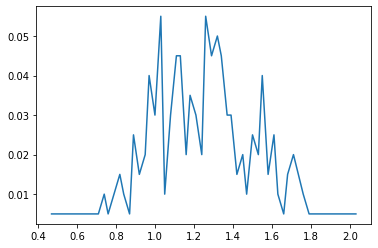

In [ ]:
plt.plot(fp)

In [ ]:
repart = fp.cumsum()

Text(0.5, 1.0, 'Gráfico Acumulado')

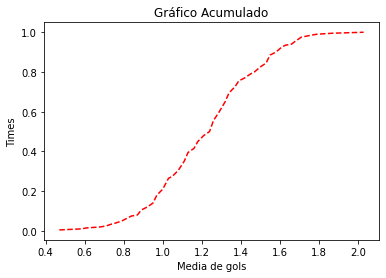

In [ ]:
plt.plot(repart, 'r--')
plt.xlabel('Media de gols')
plt.ylabel('Times')
plt.title('Gráfico Acumulado')

Mostragem de um gráfico da media de gols feita quantidades de times durante estes 10 anos de campeonato.

##Covariância

In [ ]:
df[['Vitoria','Gols pro']].cov()

,Vitoria,Gols pro
Vitoria,15.742688,29.716985
Gols pro,29.716985,104.747337


Apresentação da covariância entre vitorias e gols marcados de uma equipe, mostrando que existe uma dependecia de uma sob a outra.

##Correlação

In [ ]:
df[['Vitoria','Gols pro']].corr()

,Vitoria,Gols pro
Vitoria,1.000000,0.731802
Gols pro,0.731802,1.000000


Apresentação da correlação sobre as vitórias de um time e gols marcados. Existe uma correlação muito forte entre essas duas váriaves, ja que ela esta muito próxima de 1.

# **Estatistica Descritiva**


## **Box Plot**

In [ ]:
fig2 = px.box(df, x='Vitoria', y='Gols Contra')
fig2.show()

NameError: ignored

A partir deste boxplot analisar os quartis e suas medianas, tirando como exemplo podemos fazer uma analise objetiva da relação de gols sofridos com o número de vitorias. Podemos notar que existem poucas anomalias, como um time ter 10 vitorias só que sofreu 71 gols durante toda sua campanha no campeonato, e que a sua mediana neste caso é de 50.5 e o minimo de gols recebidos foram 38.


## **Histograma**

In [ ]:
fig = px.histogram(df, x = 'Gols pro', marginal = 'rug')
fig.show()

Através deste histograma, podemos analisar a quantidade de times que fizeram certa quantidade de gols durante este 10 anos de dados analisados dos campeonatos brasilerios. Podemos analisar que o minimo de gols feitos registrado por um time nestes dados foi de 15 gols, e pouquissimos times conseguiram marcar mais de 65 gols.

## **Scatter Plot**

In [ ]:
col = df[['Vitoria', 'Empates', 'Derrotas', 'Gols pro', 'Gols Contra']]
sns.pairplot(col)

Após analisar relaçoes do Scatter Plot acima, é notavel que a relação entre Gols contra e Vitoria é decrescente, logo esses dados possuem uma correlação negativa, diferente de Gols contra e Derroas que possuem uma correlação forte, ja que se um time sofrer muitos gols a sua taxa de derrotas poderá ser bem alta!

## **HeatMap**

In [ ]:
colcorr = df[['Vitoria', 'Empates', 'Derrotas', 'Gols pro', 'Gols Contra']].corr()
sns.heatmap(colcorr,cmap = "RdBu", square = True, linecolor = "grey", annot= True)

Um mapa de calor que mostra a correlação entre quatro variaveis de meu DataSet, sendo essas Vitoria,empates,derroas,Gols pro e gols contra.
Podemos que notar que Gols pro tem uma alta correlação com vitoria, diferente de Gols contra em relação a vitoria.

# **Normal Padrão**


In [ ]:
#Transformar a coluna Time e Estados de string para int
time = pd.get_dummies(df['Time'], drop_first=True)
estados = pd.get_dummies(df['Estados'], drop_first=True)
sg = pd.get_dummies(df['Saldo Gols'], drop_first=True)
df.drop(['Time', 'Estados','Saldo Gols','ANO'], axis=1, inplace=True)
df.head()

,Posicao,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Aproveitamento,Partidas Jogadas,Media gol p/ partida
0,1,67,19,10,9,58,44,58.8,38,1.53
1,2,65,19,8,11,65,44,57.0,38,1.71
2,3,65,18,11,9,57,42,57.0,38,1.50
3,4,62,18,8,12,58,53,54.4,38,1.53
4,5,62,17,11,10,58,45,54.4,38,1.53


Nesta celula fizemos um tratamento de dados para podermos colocar nossos dados com valores de forma padronizada, então retiramos as strings e dados que não foram utilizados para analises.

In [ ]:
scaler = StandardScaler()
ajuste = scaler.fit(df)
normal = scaler.transform(df)
normalpadrao = pd.DataFrame(normal)
normalpadrao.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.647509,1.311568,1.299973,-0.111013,-1.167074,1.085317,-0.294709,1.319153,0.0,1.099211
1,-1.474087,1.139107,1.299973,-0.903965,-0.687290,1.770987,-0.294709,1.142533,0.0,1.769348
2,-1.300665,1.139107,1.047306,0.285463,-1.167074,0.987364,-0.494512,1.142533,0.0,0.987521
3,-1.127243,0.880415,1.047306,-0.903965,-0.447398,1.085317,0.604403,0.887416,0.0,1.099211
4,-0.953821,0.880415,0.794639,0.285463,-0.927182,1.085317,-0.194808,0.887416,0.0,1.099211


In [ ]:
normalpadrao.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.0,200.000000
mean,8.881784e-18,5.551115e-17,-1.243450e-16,2.486900e-16,-5.329071e-17,-1.598721e-16,-2.664535e-16,-1.443290e-16,0.0,0.000000
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,0.0,1.002509
min,-1.647509e+00,-2.741272e+00,-2.490036e+00,-2.886345e+00,-2.366533e+00,-2.832796e+00,-2.492540e+00,-2.782350e+00,0.0,-2.847151
25%,-8.237545e-01,-6.717367e-01,-7.213651e-01,-5.074892e-01,-6.872900e-01,-7.757864e-01,-6.943147e-01,-6.334761e-01,0.0,-0.762281
50%,0.000000e+00,-6.812221e-02,3.663676e-02,-1.110133e-01,3.238539e-02,5.681264e-02,-9.490633e-02,-4.964977e-02,0.0,0.056775
75%,8.237545e-01,6.217229e-01,5.419713e-01,6.819386e-01,7.520608e-01,5.955532e-01,6.044034e-01,6.519231e-01,0.0,0.577993
max,1.647509e+00,2.518797e+00,2.563310e+00,2.664318e+00,3.390871e+00,2.946421e+00,3.201840e+00,2.516242e+00,0.0,2.960702


Após a realização do tratamento de dados, nos realizamos a padronização dos dados inteiros do DataSet escolho como foi mostrado nas tabela acima.

# **Distribuição Amostral**

Utilizamos a função para pegarmos um número aleatorio numero da coluna escolhida com reposição e mudamos o numero de amostras de população para podermos checar a evolução dos dados.
Utilizei este site como referência: https://datatofish.com/random-rows-pandas-dataframe/

###**1 amostra**

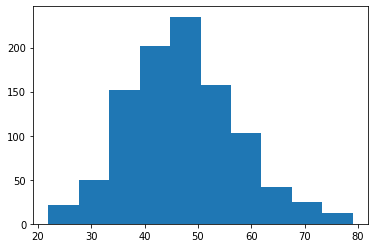

In [ ]:
distAmostral = [mean(df['Gols Contra'].sample(n=1,replace=True)) for _ in range(1000)]
pyplot.hist(distAmostral)
pyplot.show()

###**1000 amostras**

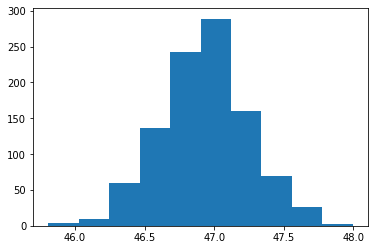

In [ ]:
distAmostral = [mean(df['Gols Contra'].sample(n=1000,replace=True)) for _ in range(1000)]
pyplot.hist(distAmostral)
pyplot.show()

###**10000 amostras**

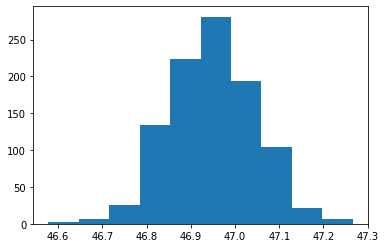

In [ ]:
distAmostral = [mean(df['Gols Contra'].sample(n=10000,replace=True)) for _ in range(1000)]
pyplot.hist(distAmostral)
pyplot.show()

Podemos ver acima três histogramas e fazendo a analise das médias de valores de uma mesma coluna so que com quantidades de amostras diferentes. É possivel notar que a cada vez que aumentamos a quantidade de amostras, mais precisa ficará nossa análise como podemos notar na evolução do primeiro gráfico em relação ao terceiro.

# **Intervalo de Confiança**

In [ ]:
dsvpd = np.std(df['Gols Contra'])
a = sum(df['Gols Contra'])
b = len(df['Gols Contra'])
media = a/b

In [ ]:
#1,96 -> 95%
#1,65 -> 90%
#200 -> total de linhas da coluna utilizada
ic1 = media - 1.96 * np.std(df['Gols Contra'])/np.sqrt(200)
ic2 = media + 1.96 * np.std(df['Gols Contra'])/np.sqrt(200)
print('95%')
print('Intervalo -: ',ic1)
print('Intervalo +: ',ic2)
ic1 = media - 1.64 * np.std(df['Gols Contra'])/np.sqrt(200)
ic2 = media + 1.64 * np.std(df['Gols Contra'])/np.sqrt(200)
print('---------------------------------------------')
print('90%')
print('Intervalo -: ',ic1)
print('Intervalo +: ',ic2)

95%
Intervalo -:  45.562702778781706
Intervalo +:  48.3372972212183
---------------------------------------------
90%
Intervalo -:  45.789200284286736
Intervalo +:  48.11079971571327


Aplicação da formula de intervalo de confiança, com isso podemos comparar com os histogramas gerados acima e notamos que existe um grau de confiança condizente com os resultados abaixo.